## Data Renaming and cleaning

In [1]:
import pandas as pd

df = pd.read_csv('dataset.csv')

new_columns = {
    'Timestamp': 'timestamp',
    'By selecting the agree option, you are confirming the following:\n•  I have read all the information in this participant Information and Consent Form including any information regarding the risk in this study and I have had time to think about it.\n•  I voluntarily agree to be part of this research study, to follow the study procedures, and to provide necessary information to the researcher as requested.': 'consent',
    '1. What is your gender?': 'gender',
    '2. What is your course?': 'course',
    '3. What is your academic year?': 'academic_year',
    '4. What is your current CGPA?': 'cgpa',
    '5. What is your familiarity with Generative AI Tools(e.g. ChatGPT, DeepSeek, Google Gemini, Microsoft Coplilot)?': 'ai_familiarity',
    '6.  How frequently do you use generative AI tools for academic purposes (e.g., for assignments, tutorials/practical exercises, and course study/revision)?': 'ai_usage_frequency',
    '7. On a scale of 1–5 (1 = Very Low, 5 = Very High), how would you rate your overall IT skill proficiency (including programming, troubleshooting, and system design) in your academic work?': 'it_proficiency',
    '8. Select the programming language that you familiar with': 'programming_languages',
    '9. How many co-curricular activities such as workshop, competition (e.g. Hackathon) which is IT-related you had participated?': 'it_activities_count',
    '10. How many IT-related project had you completed? (Including assignment project, competition project, etc.)': 'it_projects_count',
    '11. I can independently troubleshoot technical issues and solve IT-related problems, whether or not I use generative AI tools.': 'independent_troubleshooting',
    '12. Generative AI tools (e.g., ChatGPT, GitHub Copilot) help me better understand challenging IT course concepts.': 'ai_helps_understanding',
    '13. Using generative AI has improved my efficiency in completing IT assignments and projects.': 'ai_improves_efficiency',
    '14. Generative AI tools are useful for brainstorming and developing innovative solutions during coursework.': 'ai_useful_brainstorming',
    '15. Integrating generative AI into my coursework has positively impacted my overall academic performance.': 'ai_positive_impact',
    '16. The integration of generative AI in our curriculum has significantly increased my engagement and motivation to learn IT concepts.': 'ai_increases_engagement',
    '17. I often rely on generative AI tools to solve coding or technical problems without first attempting to solve them on my own.': 'ai_over_reliance',
    '18. When I use generative AI, I sometimes bypass understanding the underlying logic behind the solution.': 'ai_bypass_understanding',
    '19. I feel less confident in my ability to write code independently due to my frequent use of generative AI tools.': 'ai_reduces_confidence',
    '20. I have experienced a decline in my debugging and troubleshooting skills as a result of relying on generative AI tools.': 'ai_reduces_debugging_skills',
    '21. Frequent use of generative AI has reduced my motivation to practice and improve my core IT skills manually.': 'ai_reduces_motivation'
}

df = df.rename(columns=new_columns)

df.to_csv('renamed_dataset.csv', index=False)

print("Updated column names:")
print(df.columns.tolist())

Updated column names:
['timestamp', 'consent', 'gender', 'course', 'academic_year', 'cgpa', 'ai_familiarity', 'ai_usage_frequency', 'it_proficiency', 'programming_languages', 'it_activities_count', 'it_projects_count', 'independent_troubleshooting', 'ai_helps_understanding', 'ai_improves_efficiency', 'ai_useful_brainstorming', 'ai_positive_impact', 'ai_increases_engagement', 'ai_over_reliance', 'ai_bypass_understanding', 'ai_reduces_confidence', 'ai_reduces_debugging_skills', 'ai_reduces_motivation']


In [2]:
df = df.drop(['timestamp','consent'],axis=1)

In [3]:
df.columns

Index(['gender', 'course', 'academic_year', 'cgpa', 'ai_familiarity',
       'ai_usage_frequency', 'it_proficiency', 'programming_languages',
       'it_activities_count', 'it_projects_count',
       'independent_troubleshooting', 'ai_helps_understanding',
       'ai_improves_efficiency', 'ai_useful_brainstorming',
       'ai_positive_impact', 'ai_increases_engagement', 'ai_over_reliance',
       'ai_bypass_understanding', 'ai_reduces_confidence',
       'ai_reduces_debugging_skills', 'ai_reduces_motivation'],
      dtype='object')

In [4]:
df.shape

(151, 21)

In [5]:
df[df.isna()].count()

gender                         0
course                         0
academic_year                  0
cgpa                           0
ai_familiarity                 0
ai_usage_frequency             0
it_proficiency                 0
programming_languages          0
it_activities_count            0
it_projects_count              0
independent_troubleshooting    0
ai_helps_understanding         0
ai_improves_efficiency         0
ai_useful_brainstorming        0
ai_positive_impact             0
ai_increases_engagement        0
ai_over_reliance               0
ai_bypass_understanding        0
ai_reduces_confidence          0
ai_reduces_debugging_skills    0
ai_reduces_motivation          0
dtype: int64

In [6]:
df = df.drop_duplicates()
df.shape

(151, 21)

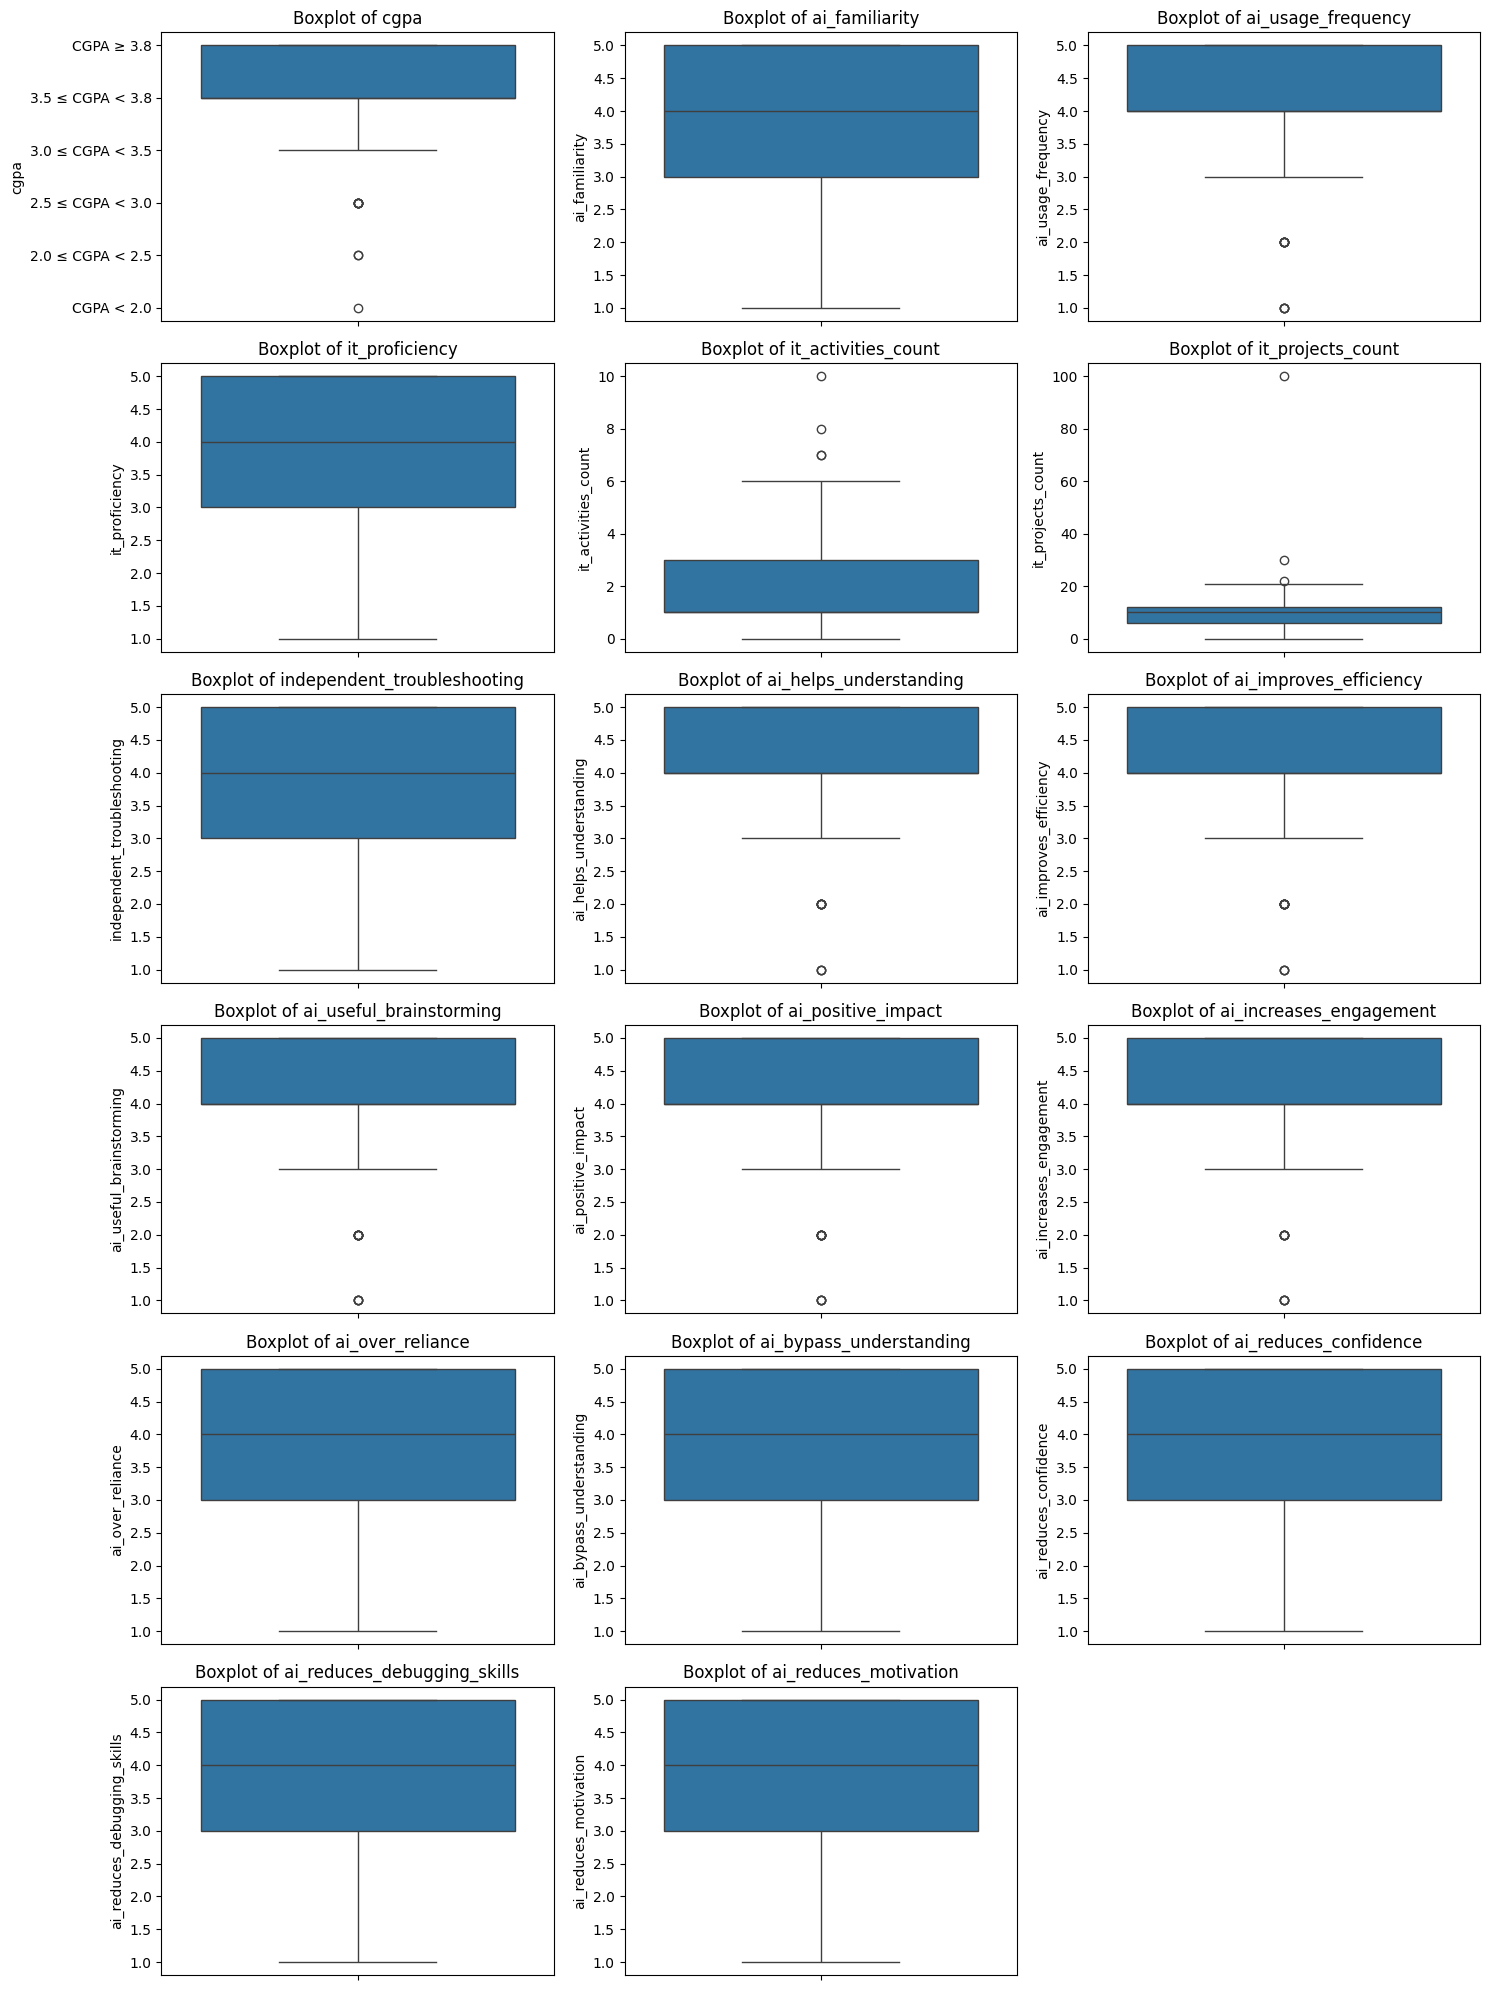

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['cgpa', 'ai_familiarity', 'ai_usage_frequency', 'it_proficiency', 
                  'it_activities_count', 'it_projects_count', 'independent_troubleshooting',
                  'ai_helps_understanding', 'ai_improves_efficiency', 'ai_useful_brainstorming',
                  'ai_positive_impact', 'ai_increases_engagement', 'ai_over_reliance',
                  'ai_bypass_understanding', 'ai_reduces_confidence', 'ai_reduces_debugging_skills',
                  'ai_reduces_motivation']

plt.figure(figsize=(15, 20))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [7]:
def clean_academic_year(x):
    if x == 'Year 1':
        return 1
    elif x == 'Year 2':
        return 2
    elif x == 'Year 3':
        return 3
    elif x == 'Year 4':
        return 4
    
def clean_CGPA(x):
    if x == 'CGPA ≥ 3.8':
        return 6
    elif x == '3.5 ≤ CGPA < 3.8':
        return 5
    elif x == '3.0 ≤ CGPA < 3.5':
        return 4
    elif x == '2.5 ≤ CGPA < 3.0':
        return 3
    elif x == '2.0 ≤ CGPA < 2.5':
        return 2
    elif x == 'CGPA < 2.0':
        return 1

def no_of_programming_lang(x):
    return len(x.split(';'))

gender_mapping = {
    "Male": 1,
    "Female": 0
}

course_mapping = {
    "Foundation in Computing": 0,
    "Diploma in Computer Science": 1,
    "Diploma in Information Technology": 1,
    "Bachelor of Science (Honours) in Management Mathematics with Computing": 2,
    "Bachelor of Information Systems (Honours) in Enterprise Information Systems": 2,
    "Bachelor of Computer Science (Honours) in Interactive Software Technology": 2,
    "Bachelor of Information Technology (Honours) in Information Security": 2,
    "Bachelor in Data Science (Honours)": 2,
    "Bachelor of Information Technology (Honours) in Software Systems Development": 2,
    "Bachelor of Software Engineering (Honours)": 2,
    "Doctor of Philosophy in Computer Science": 4,
    "Doctor of Philosophy (Information Technology)": 4,
    "Doctor of Philosophy (Mathematical Sciences)": 4,
    "Master of Computer Science": 3,
    "Master of Information Technology": 3,
    "Master of Science in Mathematical Sciences": 3,
    "Master in Digital Transformation": 3
}


df['cgpa'] = df['cgpa'].apply(clean_CGPA)
df['course'] = df['course'].map(course_mapping)
df['gender'] = df['gender'].map(gender_mapping)
df['academic_year'] = df['academic_year'].apply(clean_academic_year)
df['programming_languages'] = df['programming_languages'].apply(no_of_programming_lang)

In [8]:
df

,gender,course,academic_year,cgpa,ai_familiarity,ai_usage_frequency,it_proficiency,programming_languages,it_activities_count,it_projects_count,...,ai_helps_understanding,ai_improves_efficiency,ai_useful_brainstorming,ai_positive_impact,ai_increases_engagement,ai_over_reliance,ai_bypass_understanding,ai_reduces_confidence,ai_reduces_debugging_skills,ai_reduces_motivation
0,1,2,2,6,5,5,4,8,0,8,...,3,3,3,3,3,3,3,3,3,3
1,0,2,2,6,5,5,5,5,1,11,...,5,5,5,5,5,2,3,4,3,2
2,0,2,2,6,4,4,4,6,2,11,...,4,4,4,4,4,4,4,3,3,3
3,1,2,2,5,4,4,3,3,0,7,...,4,4,4,4,4,4,2,3,3,3
4,1,2,2,5,4,5,2,4,0,8,...,4,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,2,2,5,5,4,4,6,1,13,...,4,4,4,4,4,4,4,4,4,4
147,1,2,3,5,4,4,4,6,4,12,...,5,5,5,5,5,5,5,5,5,5
148,1,2,2,6,5,5,5,6,1,13,...,5,5,5,5,5,5,5,5,5,5
149,1,2,3,6,5,5,5,6,2,17,...,5,4,4,4,4,4,4,4,4,4


In [9]:
df.to_csv('cleaned_dataset.csv',index=False)

## Data Analysis

In [ ]:
import pandas as pd

df = pd.read_csv('cleaned_dataset.csv')

In [2]:
import pingouin as pg

overall_df = df
demographic_df = df[['gender', 'course', 'academic_year','ai_familiarity','ai_usage_frequency']]
hypothesis1_df = df[['cgpa','it_proficiency', 'programming_languages', 'it_activities_count', 'it_projects_count', 'independent_troubleshooting']]
hypothesis2_df = df[['ai_helps_understanding', 'ai_improves_efficiency', 'ai_useful_brainstorming', 'ai_positive_impact', 'ai_increases_engagement',]]
hypothesis3_df = df[['ai_over_reliance', 'ai_bypass_understanding', 'ai_reduces_confidence', 'ai_reduces_debugging_skills', 'ai_reduces_motivation']]

dfs = [overall_df,demographic_df,hypothesis1_df,hypothesis2_df,hypothesis3_df]
df_names = ["Overall", "Demography", "Hypo 1", "Hypo 2", "Hypo 3"]

print("Cronbach's Alphas:")
for i, x in enumerate(dfs):
    alpha, ci = pg.cronbach_alpha(x)
    print(f"\t{df_names[i]}")
    print(f"\tCronbach Alpha: {alpha:.3f}")
    print(f"\t95% CI: [{ci[0]:.3f}, {ci[1]:.3f}]")
    print()

Cronbach's Alphas:
	Overall
	Cronbach Alpha: 0.709
	95% CI: [0.637, 0.772]

	Demography
	Cronbach Alpha: 0.554
	95% CI: [0.431, 0.657]

	Hypo 1
	Cronbach Alpha: 0.362
	95% CI: [0.191, 0.508]

	Hypo 2
	Cronbach Alpha: 0.932
	95% CI: [0.914, 0.948]

	Hypo 3
	Cronbach Alpha: 0.944
	95% CI: [0.929, 0.957]



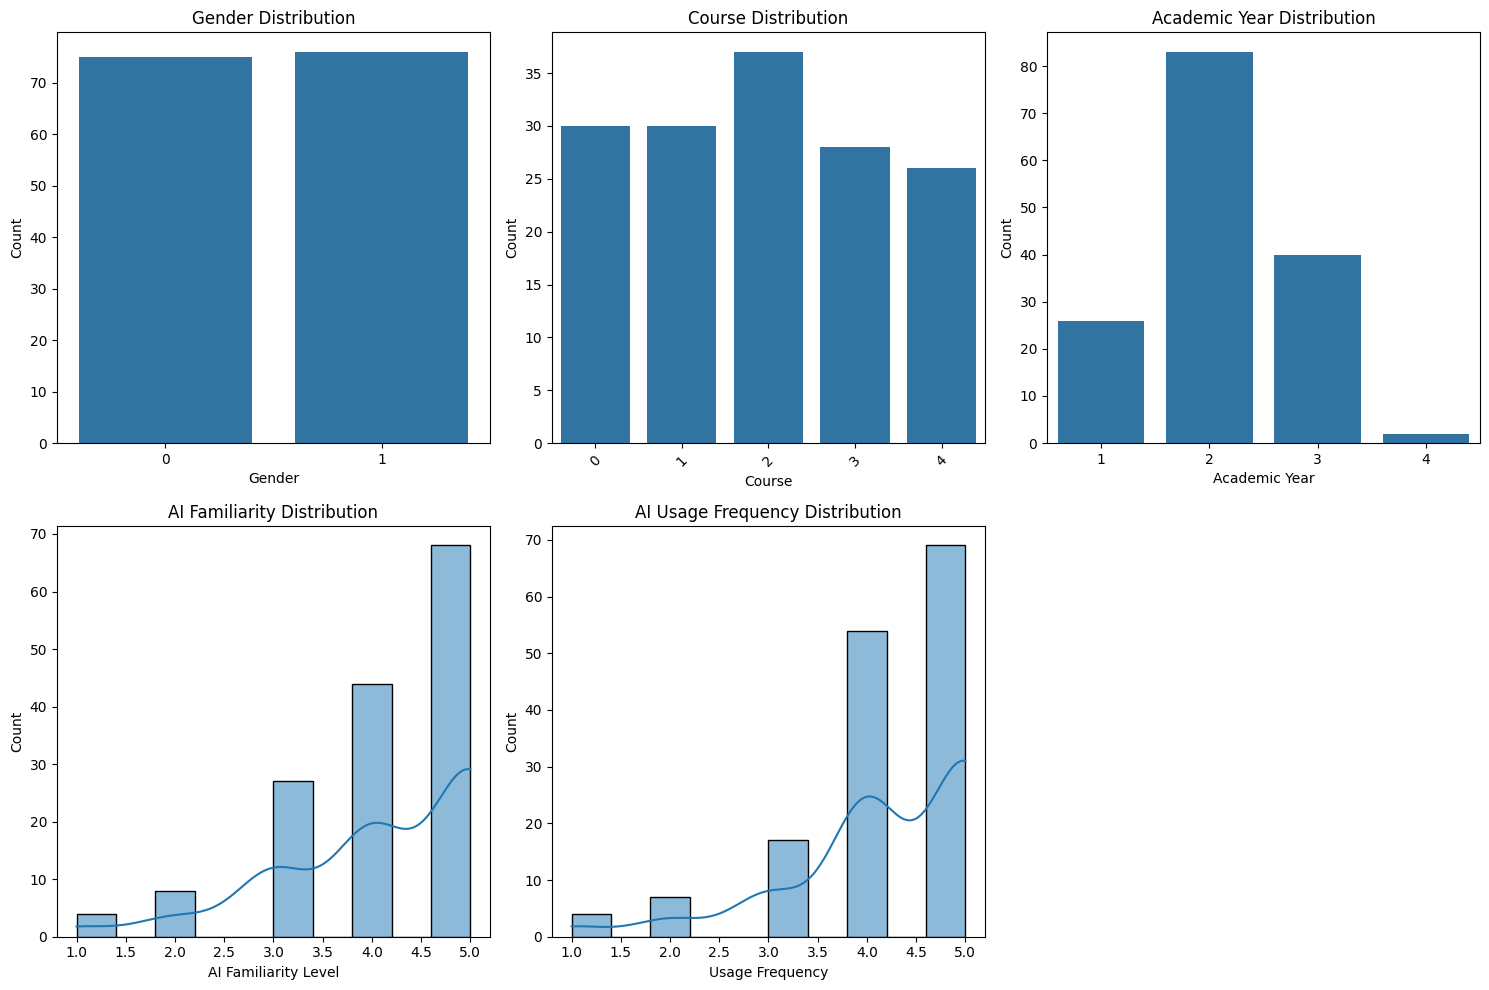

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
gender_counts = demographic_df['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
course_counts = demographic_df['course'].value_counts()
sns.barplot(x=course_counts.index, y=course_counts.values)
plt.title('Course Distribution')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
year_counts = demographic_df['academic_year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Academic Year Distribution')
plt.xlabel('Academic Year')
plt.ylabel('Count')

plt.subplot(2, 3, 4)
sns.histplot(data=demographic_df, x='ai_familiarity', bins=10, kde=True)
plt.title('AI Familiarity Distribution')
plt.xlabel('AI Familiarity Level')

plt.subplot(2, 3, 5)
sns.histplot(data=demographic_df, x='ai_usage_frequency', bins=10, kde=True)
plt.title('AI Usage Frequency Distribution')
plt.xlabel('Usage Frequency')

plt.tight_layout()
plt.show()

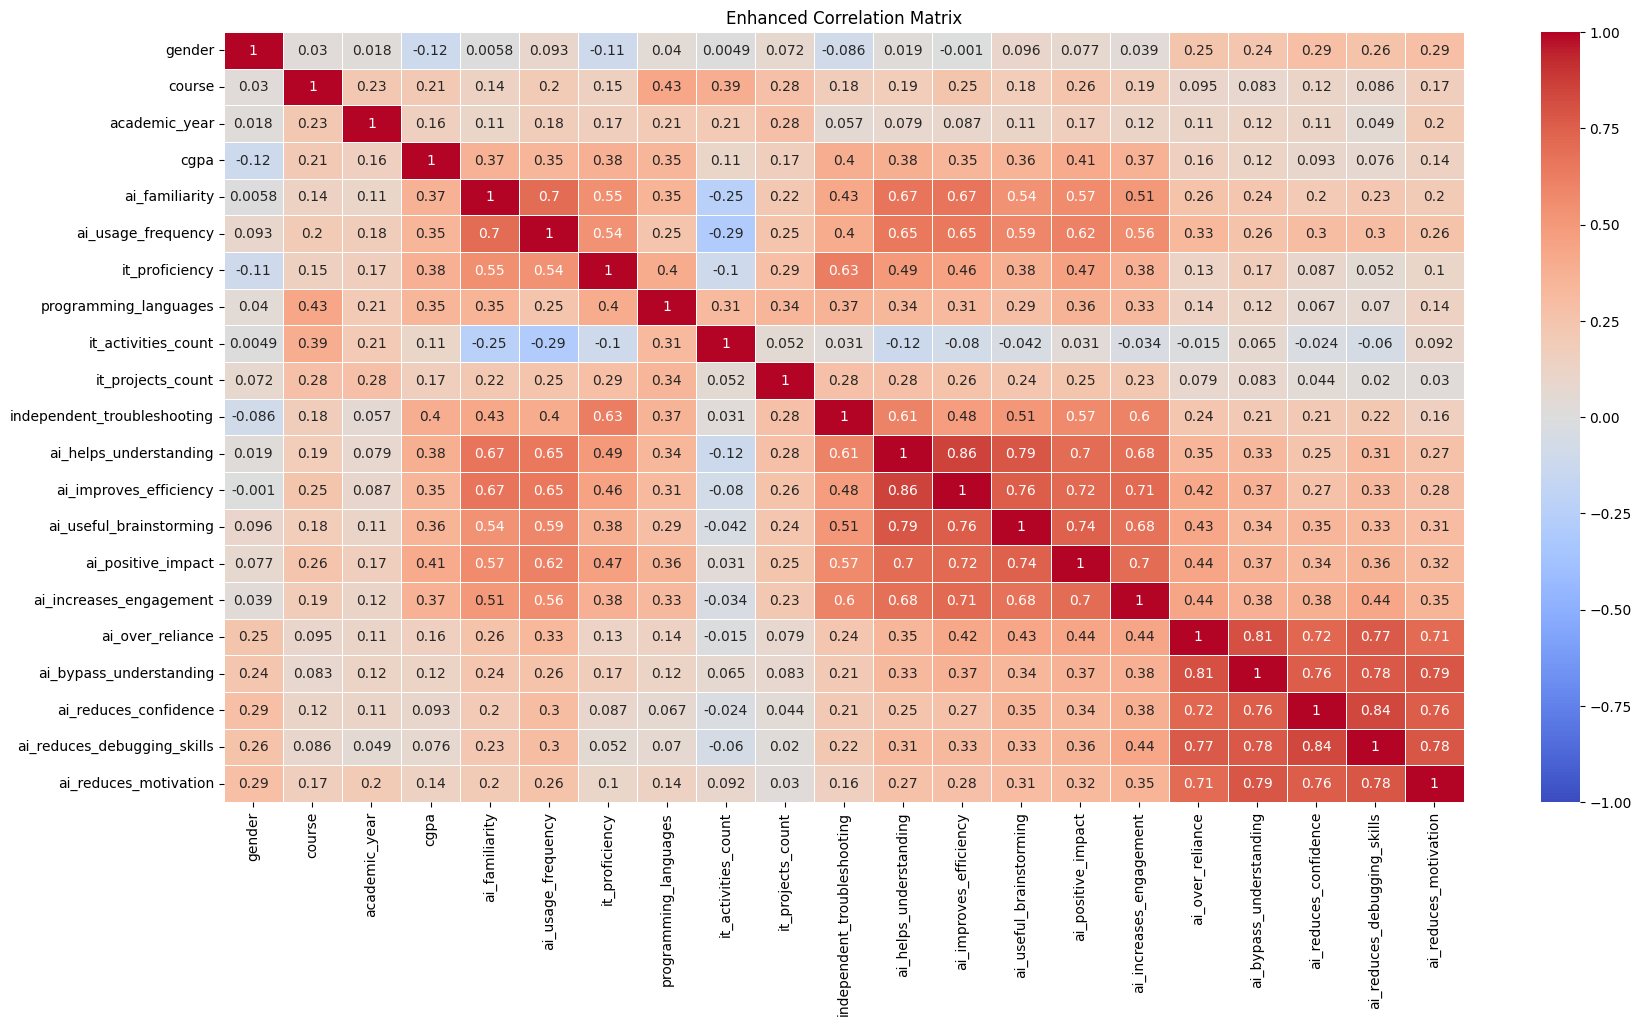

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, vmax=1, 
            linewidths=.5)
plt.title('Enhanced Correlation Matrix')
plt.show()

### **Key Observations from the Correlation Matrix**  

#### **Academic Performance & Gender**  
- There’s a **very weak negative correlation (-0.115)** between gender and CGPA.  
- This means gender doesn’t really play a significant role in determining academic performance. If there is an effect, it’s minimal.  

**Takeaway:** Performance is more likely influenced by factors like study habits, motivation, and access to resources rather than gender itself.  

#### **AI Familiarity & AI Usage**  
- A **strong correlation (0.695)** suggests that students who are more familiar with AI tools tend to use them frequently.  
- This makes sense—if you’re comfortable with AI, you’re more likely to integrate it into your daily tasks, whether that’s studying, coding, or brainstorming ideas.  

**Takeaway:** The more exposure students have to AI, the more they use it—suggesting that AI education could be key in increasing adoption.  

#### **IT Proficiency & Coding Skills**  
- A **moderate correlation (0.378)** between IT proficiency and knowing multiple programming languages.  
- This suggests that being tech-savvy makes it easier to learn and work with different coding languages.  

**Takeaway:** If someone struggles with learning new programming languages, improving their general IT skills (e.g., troubleshooting, using different software, understanding system basics) might help.  

#### **Does AI Actually Help Students?**  
- **AI Helps Understanding vs. AI Improves Efficiency (0.670)** → People who believe AI helps them understand concepts also feel it makes them more efficient.  
- **AI Positive Impact vs. AI Increases Engagement (0.506)** → If a student sees AI as beneficial, they also find learning more engaging.  

**Takeaway:** AI isn’t just about automation—it might actually be making learning more engaging and effective for students who use it wisely.  

#### **The Risks of Over-Reliance on AI**  
- **AI Over-Reliance vs. AI Reduces Debugging Skills (0.263)** → There’s a small but noticeable link between relying too much on AI and losing hands-on problem-solving skills, like debugging.  
- **AI Over-Reliance vs. AI Bypassing Understanding (0.237)** → Some students who heavily depend on AI might be skipping deeper learning.  

**Takeaway:** AI can be an amazing tool, but if students rely too much on it without understanding the concepts, they might struggle with real problem-solving later. **Balance is key!**  

### **Final Thoughts**  
- **AI seems to boost engagement and efficiency for many students**—it’s seen as a helpful tool rather than just a shortcut.  
- **Tech skills and programming go hand in hand**—the better the overall IT proficiency, the better the coding skills.  
- **Watch out for AI over-reliance**—using AI wisely can enhance learning, but depending on it too much might weaken critical thinking and problem-solving skills.  

# Hypothesis 1

In [5]:
#One sample t-test for it-proficiency
from IPython.display import display

it_proficiency = df['it_proficiency']
h0_mean = 2

result = pg.ttest(it_proficiency, h0_mean, alternative='greater') 
display(result)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,23.346079,150,greater,4.171430e-52,"[3.84, inf]",1.899877,4.262e+48,1.0


The p-value is lesser than 0.05, the h0 is rejected and h1 is accepted. Indicating TARUMT FOCS student has acquired at least moderate it proficiency skill in this generative AI era.

In [6]:
#Regression analysis for Hypothesis 1

from IPython.display import display
import pingouin as pg

h1_X = hypothesis1_df.drop(columns=['it_proficiency'])
h1_Y = hypothesis1_df['it_proficiency']

results = pg.linear_regression(h1_X, h1_Y)
results["significance"] = results["pval"] < 0.05
results["significance"] = results["significance"].replace({True: 'Significant', False: 'Not Significant'})
display(results)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],significance
0,Intercept,1.140520,0.341345,3.341253,1.060831e-03,0.480497,0.462584,0.465865,1.815174,Significant
1,cgpa,0.125189,0.071243,1.757218,8.099126e-02,0.480497,0.462584,-0.015619,0.265998,Not Significant
2,programming_languages,0.113470,0.036182,3.136054,2.073756e-03,0.480497,0.462584,0.041957,0.184983,Significant
3,it_activities_count,-0.125968,0.038718,-3.253485,1.418439e-03,0.480497,0.462584,-0.202493,-0.049444,Significant
4,it_projects_count,0.007399,0.007613,0.971829,3.327539e-01,0.480497,0.462584,-0.007649,0.022446,Not Significant
5,independent_troubleshooting,0.440435,0.062348,7.064127,6.247005e-11,0.480497,0.462584,0.317206,0.563663,Significant


Based on the regression results, we can conclude about the impact of independent variables on **IT Proficiency**:

### **1. Significant Variables (p < 0.05)**
These variables have a statistically significant impact on **IT Proficiency**:
- **Intercept** (p = 0.001) → Baseline effect
- **programming_languages** (p = 0.002) → Positive effect (coef = 0.113)
- **it_activities_count** (p = 0.001) → Negative effect (coef = -0.126)
- **independent_troubleshooting** (p < 0.001) → Strong positive effect (coef = 0.440)

### **2. Non-Significant Variables (p > 0.05)**
These variables do **not** significantly impact **IT Proficiency**:
- **cgpa** (p = 0.081) → No significant impact
- **it_projects_count** (p = 0.33) → No significant impact

### **3. Insights**
- **The most impactful factor is** **independent_troubleshooting** (coef = 0.440, p < 0.001), meaning that **improving independent troubleshooting skills leads to the highest increase in IT proficiency**.
- **Programming knowledge matters** (programming_languages, coef = 0.113, p = 0.002), but its impact is smaller compared to troubleshooting.
- **More IT activities actually decrease IT proficiency** (it_activities_count, coef = -0.126, p = 0.001). This could suggest that engaging in too many IT activities without focus **hurts proficiency**.
- **CGPA and IT project count do not significantly affect IT proficiency.** This might due to the nature of CGPA which is a measurement in academic performance but not in practical application while building It project might not require fully understanding of the IT concept behind it.

### **4. Final Verdict**
Not all independent variables significantly contribute to changes in **IT Proficiency**. The key contributors are **programming languages, IT activities count (negative), and independent troubleshooting**.

# Hypothesis 2

In [ ]:
#Multivariate ANOVA using high or low adoption of GenAI

from statsmodels.multivariate.manova import MANOVA

hypothesis2_df['ai_usage_group'] = df['ai_usage_frequency'].apply(lambda x: 'High Adoption' if x >= 3 else 'Low Adoption')

manova = MANOVA.from_formula('ai_helps_understanding + ai_improves_efficiency + \
                              ai_useful_brainstorming + ai_positive_impact + \
                              ai_increases_engagement ~ ai_usage_group', data=hypothesis2_df)

print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.5053 5.0000 145.0000 28.3910 0.0000
         Pillai's trace 0.4947 5.0000 145.0000 28.3910 0.0000
 Hotelling-Lawley trace 0.9790 5.0000 145.0000 28.3910 0.0000
    Roy's greatest root 0.9790 5.0000 145.0000 28.3910 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
     ai_usage_group     Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7511 5.0000 145.0000  9.6081 0.0000
         Pillai's trace 0.2489 5.0000 145.0000  9.6081 0.0000
 Hotelling-Lawley trace 0.

C:\Users\raint\AppData\Local\Temp\ipykernel_13656\2789964906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis2_df['ai_usage_group'] = pd.cut(df['ai_familiarity'], bins=[0, 2, 5], labels=label)
C:\Users\raint\AppData\Local\Temp\ipykernel_13656\2789964906.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis2_df['ai_usage_group'] = hypothesis2_df['ai_usage_group'].astype('category')


Pr > F (p-value) for ai_usage_group:

- Wilks' Lambda: p = 0.0000 (significant)

- Pillai's Trace: p = 0.0000 (significant)

- Hotelling-Lawley Trace: p = 0.0000 (significant)

- Roy’s Greatest Root: p = 0.0000 (significant)

Since p < 0.05, AI usage has a significant impact on at least one of the dependent variables.

Wilks' Lambda = 0.7511 → About 75.11% of the variance is unexplained by AI usage, while 24.89% is explained by AI usage.

Pillai’s Trace = 0.2489 → 24.89% of the variance in the dependent variables is due to AI usage.

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA for each survey question in Hypothesis 2
dependent_vars = [
    'ai_helps_understanding',
    'ai_improves_efficiency',
    'ai_useful_brainstorming',
    'ai_positive_impact',
    'ai_increases_engagement'
]

for var in dependent_vars:
    model = ols(f'{var} ~ ai_usage_group', data=hypothesis2_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA for {var}")
    print(anova_table)



ANOVA for ai_helps_understanding
                    sum_sq     df          F        PR(>F)
ai_usage_group   29.287786    1.0  38.423522  5.311183e-09
Residual        113.573141  149.0        NaN           NaN

ANOVA for ai_improves_efficiency
                    sum_sq     df          F        PR(>F)
ai_usage_group   32.362289    1.0  39.581815  3.319179e-09
Residual        121.823141  149.0        NaN           NaN

ANOVA for ai_useful_brainstorming
                    sum_sq     df          F    PR(>F)
ai_usage_group   20.766310    1.0  22.518544  0.000005
Residual        137.405875  149.0        NaN       NaN

ANOVA for ai_positive_impact
                    sum_sq     df         F        PR(>F)
ai_usage_group   28.008068    1.0  32.77137  5.522527e-08
Residual        127.342926  149.0       NaN           NaN

ANOVA for ai_increases_engagement
                    sum_sq     df          F        PR(>F)
ai_usage_group   25.877877    1.0  31.018257  1.161157e-07
Residual        124.3

All p of each ANOVA test is < 0.05, this specific each survey question is significantly influenced by AI usage.

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

dependent_vars = [
    'ai_helps_understanding',
    'ai_improves_efficiency',
    'ai_useful_brainstorming',
    'ai_positive_impact',
    'ai_increases_engagement'
]

for var in dependent_vars:
    tukey = pairwise_tukeyhsd(hypothesis2_df[var], hypothesis2_df['ai_usage_group'])
    print(f"\nTukey for {var}")
    print(tukey)



Tukey for ai_helps_understanding
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1       group2    meandiff p-adj  lower   upper  reject
----------------------------------------------------------------
High Adoption Low Adoption  -1.6283   0.0 -2.1474 -1.1092   True
----------------------------------------------------------------

Tukey for ai_improves_efficiency
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
    group1       group2    meandiff p-adj  lower  upper  reject
---------------------------------------------------------------
High Adoption Low Adoption  -1.7116   0.0 -2.2492 -1.174   True
---------------------------------------------------------------

Tukey for ai_useful_brainstorming
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
    group1       group2    meandiff p-adj lower   upper  reject
---------------------------------------------------------------
High Adoption Low Adoption  -1.3711   0.0 -1.942 -0.8002   T

### **Interpretation of Tukey HSD Results**  
Since **all p-values are < 0.05**, we **reject the null hypothesis** and conclude that students with **high AI adoption score significantly higher** in their perception of AI's benefits compared to students with **low AI adoption**.  

- **AI Helps Understanding (p < 0.001, diff = -1.6283)** → High AI adopters believe AI significantly enhances their understanding of IT concepts.  
- **AI Improves Efficiency (p < 0.001, diff = -1.7116)** → High AI adopters find AI significantly improves their efficiency in learning and problem-solving.  
- **AI is Useful for Brainstorming (p < 0.001, diff = -1.3711)** → High AI adopters use AI more for idea generation and creative problem-solving.  
- **AI Has a Positive Impact (p < 0.001, diff = -1.5923)** → High AI adopters generally see AI as beneficial for IT education.  
- **AI Increases Engagement (p < 0.001, diff = -1.5306)** → High AI adopters report greater engagement and motivation in learning IT concepts due to AI.  

The MANOVA test showed that AI adoption significantly influences students’ understanding, efficiency, brainstorming ability, academic performance, and engagement (Wilks' λ = 0.7511, p = 0.000). Post-hoc Tukey tests confirmed that students with high AI adoption consistently rated AI's impact significantly higher than low AI adoption students across all five survey factors (p < 0.05). The largest effect was seen in efficiency improvement, suggesting AI helps students work more effectively on assignments and projects.

# Hypothesis 3

In [ ]:
#Multivariate ANOVA using high or low adoption of GenAI

from statsmodels.multivariate.manova import MANOVA

hypothesis3_df['ai_over_reliance'] = hypothesis3_df['ai_over_reliance'].apply(lambda x: 'High Reliance' if x >= 3 else 'Low Reliance')

manova = MANOVA.from_formula('ai_bypass_understanding + ai_reduces_confidence + ai_reduces_debugging_skills + ai_reduces_motivation ~ ai_over_reliance', data=hypothesis3_df)

print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.5177 4.0000 146.0000 33.9982 0.0000
         Pillai's trace 0.4823 4.0000 146.0000 33.9982 0.0000
 Hotelling-Lawley trace 0.9315 4.0000 146.0000 33.9982 0.0000
    Roy's greatest root 0.9315 4.0000 146.0000 33.9982 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
    ai_over_reliance    Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.4948 4.0000 146.0000 37.2634 0.0000
         Pillai's trace 0.5052 4.0000 146.0000 37.2634 0.0000
 Hotelling-Lawley trace 1.

C:\Users\raint\AppData\Local\Temp\ipykernel_13656\1588267160.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis3_df['ai_over_reliance'] = pd.cut(df['ai_over_reliance'], bins=[0, 2, 5], labels=label)
C:\Users\raint\AppData\Local\Temp\ipykernel_13656\1588267160.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypothesis3_df['ai_over_reliance'] = hypothesis3_df['ai_over_reliance'].astype('category')


Pr > F (p-value) for ai_over_reliance:

- Wilks' Lambda: p = 0.0000 (significant)

- Pillai's Trace: p = 0.0000 (significant)

- Hotelling-Lawley Trace: p = 0.0000 (significant)

- Roy’s Greatest Root: p = 0.0000 (significant)

Since p < 0.05, AI usage has a significant impact on at least one of the dependent variables.

Wilks' Lambda = 0.4948 → About 49.48% of the variance is unexplained by AI over reliance, while 50.52% is explained by AI over reliance.

Pillai’s Trace = 0.5052 → 50.52% of the variance in the dependent variables is due to AI usage.

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA for each survey question in Hypothesis 3
dependent_vars = [
    "ai_bypass_understanding",
    "ai_reduces_confidence",
    "ai_reduces_debugging_skills",
    "ai_reduces_motivation",
]

for var in dependent_vars:
    model = ols(f"{var} ~ ai_over_reliance", data=hypothesis3_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA for {var}")
    print(anova_table)


ANOVA for ai_bypass_understanding
                      sum_sq     df           F        PR(>F)
ai_over_reliance  118.721049    1.0  122.814381  3.410264e-21
Residual          144.033917  149.0         NaN           NaN

ANOVA for ai_reduces_confidence
                      sum_sq     df          F        PR(>F)
ai_over_reliance   95.558581    1.0  81.901673  7.272093e-16
Residual          173.845393  149.0        NaN           NaN

ANOVA for ai_reduces_debugging_skills
                      sum_sq     df           F        PR(>F)
ai_over_reliance  124.148293    1.0  118.448771  1.150478e-20
Residual          156.169587  149.0         NaN           NaN

ANOVA for ai_reduces_motivation
                      sum_sq     df          F        PR(>F)
ai_over_reliance   97.602269    1.0  71.011169  2.783434e-14
Residual          204.795082  149.0        NaN           NaN


All the p-value is smaller than 0.05, the dependent variable are all significant. Indicating the dependent variables are all individually affected by the AI over reliance

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

dependent_vars = [
    "ai_bypass_understanding",
    "ai_reduces_confidence",
    "ai_reduces_debugging_skills",
    "ai_reduces_motivation",
]


for var in dependent_vars:
    tukey = pairwise_tukeyhsd(hypothesis3_df[var], hypothesis3_df["ai_over_reliance"])
    print(f"\nTukey for {var}")
    print(tukey)



Tukey for ai_bypass_understanding
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1       group2    meandiff p-adj  lower   upper  reject
----------------------------------------------------------------
High Reliance Low Reliance   -2.251   0.0 -2.6524 -1.8496   True
----------------------------------------------------------------

Tukey for ai_reduces_confidence
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1       group2    meandiff p-adj  lower   upper  reject
----------------------------------------------------------------
High Reliance Low Reliance  -2.0195   0.0 -2.4605 -1.5786   True
----------------------------------------------------------------

Tukey for ai_reduces_debugging_skills
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1       group2    meandiff p-adj  lower   upper  reject
----------------------------------------------------------------
High Reliance Low Reliance  -2.3019   0.0 -2.719

### **Interpretation of Tukey HSD Results**  
Since **all p-values are < 0.05**, we **reject the null hypothesis** and conclude that students with **high AI reliance score significantly higher** in these survey responses compared to students with **low AI reliance**.  
 
- **Bypassing Understanding (p = 0.0156, diff = -0.958)** → AI user with over reliance tend to bypass understanding solutions more often.  
- **Reduced Confidence (p = 0.0146, diff = -0.9796)** → AI user with over reliance feel less confident in their independent coding abilities.  
- **Reduced Debugging Skills (p = 0.0024, diff = -1.2368)** → AI user with over reliance report a stronger decline in debugging skills.  
- **Reduced Motivation (p = 0.0217, diff = -0.9766)** → AI user with over reliance have lower motivation to practice core IT skills manually.  

The MANOVA test showed that AI over reliance significantly influences students’ bypassing understanding, reducing the student's confidence, reducing debugging skills and motivation (Wilks' λ = 0.4948, p = 0.0000). Post-hoc Tukey tests confirmed that students with high AI adoption consistently rated AI's impact significantly higher than low AI adoption students across all four survey factors (p < 0.05). The largest effect was seen in ai reduces debugging skills, suggesting over reliance on AI causes the students to reduce their debugging skill.